<h2>1. Import libraries </h2>

In [51]:
import pandas as pd
import numpy as np

import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
import itertools

plt.style.use('bmh')

<h2>2. Read, Pre-process and Visualize the Time Series Data </h2>

<h3>2.1. Preprocess the data</h3>

In [3]:
data_matrix = pd.read_csv("precipitation_data.csv",sep="\t")
type(data_matrix)

pandas.core.frame.DataFrame

In [4]:
data_matrix.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1962,0.101,1.929,1.320,37.500,58.018,109.024,113.457,286.205,316.882,86.972,57.246,15.156
1,1963,0.000,5.253,16.215,23.023,26.511,209.793,133.198,367.777,95.537,120.212,0.286,0.000
2,1964,0.151,0.501,12.017,7.681,1.747,112.695,199.092,141.973,322.930,31.971,7.568,0.400
3,1965,0.272,0.082,0.000,2.093,0.966,116.539,180.015,133.094,118.691,2.840,1.850,12.475
4,1966,5.439,1.949,4.044,5.869,10.855,91.042,169.883,126.087,232.812,26.421,92.471,12.820


In [5]:
data_matrix.set_index('Year', inplace=True)
data_matrix.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1962,0.101,1.929,1.320,37.500,58.018,109.024,113.457,286.205,316.882,86.972,57.246,15.156
1963,0.000,5.253,16.215,23.023,26.511,209.793,133.198,367.777,95.537,120.212,0.286,0.000
1964,0.151,0.501,12.017,7.681,1.747,112.695,199.092,141.973,322.930,31.971,7.568,0.400
1965,0.272,0.082,0.000,2.093,0.966,116.539,180.015,133.094,118.691,2.840,1.850,12.475
1966,5.439,1.949,4.044,5.869,10.855,91.042,169.883,126.087,232.812,26.421,92.471,12.820


In [6]:
data_matrix = data_matrix.transpose()
data_matrix

Year,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,...,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995
Jan,0.101,0.000,0.151,0.272,5.439,1.318,2.708,0.000,3.224,0.168,...,3.715,20.370,0.000,0.000,1.015,0.801,0.000,0.000,12.229,14.457
Feb,1.929,5.253,0.501,0.082,1.949,0.705,54.213,0.000,0.000,0.000,...,14.900,9.832,10.810,0.000,0.324,1.218,0.000,1.527,6.256,0.000
Mar,1.320,16.215,12.017,0.000,4.044,3.735,35.990,0.804,0.000,0.660,...,0.000,15.877,0.000,31.565,9.896,1.198,0.000,2.011,7.880,22.736
Apr,37.500,23.023,7.681,2.093,5.869,1.509,3.302,4.353,26.318,1.926,...,20.486,3.965,32.308,8.615,0.362,21.545,3.621,5.291,29.439,2.986
May,58.018,26.511,1.747,0.966,10.855,45.454,8.995,9.161,31.172,31.948,...,8.828,46.877,14.328,14.656,117.784,16.512,31.013,5.426,14.410,47.057
Jun,109.024,209.793,112.695,116.539,91.042,112.012,84.793,94.602,155.592,66.813,...,194.709,103.236,84.473,139.363,145.295,191.932,92.618,79.872,172.509,112.221
Jul,113.457,133.198,199.092,180.015,169.883,281.585,161.744,154.272,133.987,36.134,...,118.311,96.212,255.799,247.331,140.613,130.581,83.026,156.399,152.076,199.799
Aug,286.205,367.777,141.973,133.094,126.087,78.833,29.303,120.363,246.748,156.611,...,183.300,173.606,163.267,110.405,228.824,146.205,241.074,133.424,154.409,104.556
Sep,316.882,95.537,322.930,118.691,232.812,142.765,282.873,227.808,290.804,201.626,...,87.397,71.655,366.201,204.858,83.572,154.741,209.211,140.457,114.689,251.525
Oct,86.972,120.212,31.971,2.840,26.421,28.162,59.445,25.490,29.341,163.633,...,14.217,149.216,56.993,58.829,135.776,21.717,44.112,189.232,177.968,196.048


In [7]:
dates = pd.date_range(start='1965-01', freq='MS', periods=len(data_matrix.columns)*12)
dates

DatetimeIndex(['1965-01-01', '1965-02-01', '1965-03-01', '1965-04-01',
               '1965-05-01', '1965-06-01', '1965-07-01', '1965-08-01',
               '1965-09-01', '1965-10-01',
               ...
               '1998-03-01', '1998-04-01', '1998-05-01', '1998-06-01',
               '1998-07-01', '1998-08-01', '1998-09-01', '1998-10-01',
               '1998-11-01', '1998-12-01'],
              dtype='datetime64[ns]', length=408, freq='MS')

<h3>2.2. Visualizations and conclusions</h3>

<ul><li>Visualizations through different data plots help us understand more about the data and drives us to decide upon the next step to take.</li><li>
    They provide impotant intuitions.</li></ul>

<h4>2.2.1. Overall data plot</h4>

Text(0.5,1,'Month vs Precipitation across all years')

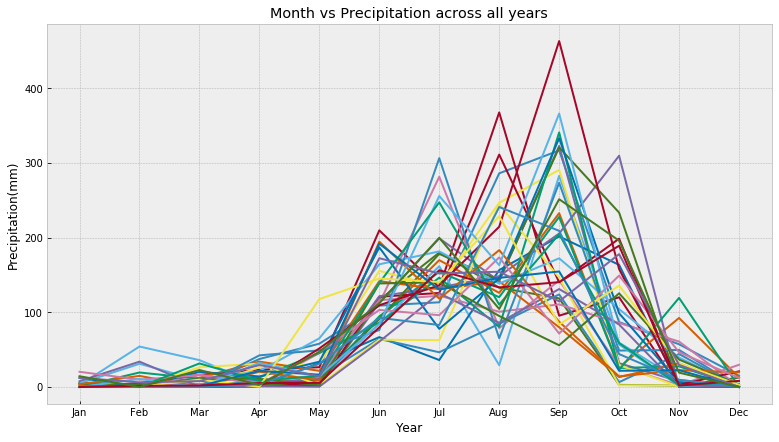

In [8]:
plt.figure(figsize=(13,7))
plt.plot(data_matrix)
plt.xlabel('Year')
plt.ylabel('Precipitation(mm)')
plt.title('Month vs Precipitation across all years')

<h4>2.2.2. Box and whisker plot</h4>

A Box and whisker plot or simply a box Plot is the visual representation of the statistical five number summary of a given data set. For more information, visit <a href="https://chartio.com/resources/tutorials/what-is-a-box-plot/">here</a> and <a href="https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review">here</a>.

Text(0.5,1,'Month vs Precipitation across all years')

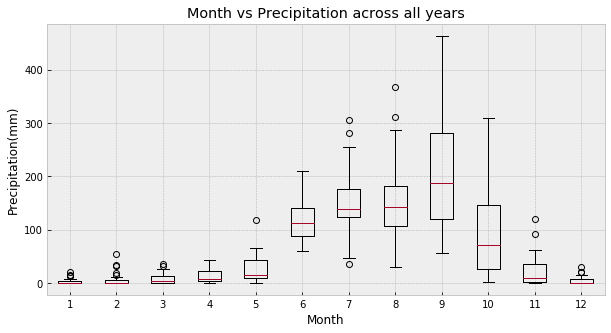

In [9]:
plt.figure(figsize=(10,5))
plt.boxplot(data_matrix)
plt.xlabel('Month')
plt.ylabel('Precipitation(mm)')
plt.title('Month vs Precipitation across all years')

<b>Inferences</b>
<ul>
<li>The rainfall in the months January, February, March, April, May, Novemberand December is very less.</li>
<li>The rainfall in the months August, September and October are high compared to rainfall in other months of the year.</li>
<li>We can see a seasonal effect with a cycle of 12 months.</li>

<h3>2.3. Convert the dataframe into series values</h3>

In [10]:
############# doubt ##############333
rainfall_data_matrix_np = data_matrix.transpose().as_matrix()

shape = rainfall_data_matrix_np.shape
rainfall_data_matrix_np = rainfall_data_matrix_np.reshape((shape[0] * shape[1], 1))

/home/vubuntu/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


<b>Divide the data into Train and Test Sets</b>

In [15]:
rainfall_data = pd.DataFrame({'Precipitation': rainfall_data_matrix_np[:,0]})
rainfall_data.set_index(dates, inplace=True)

test_data = rainfall_data.ix['1995': '2002']
train_data = rainfall_data.ix[: '1994']
type(train_data)

/home/vubuntu/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
/home/vubuntu/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated


pandas.core.frame.DataFrame

In [16]:
train_data.tail() # 1965-1994

,Precipitation
1994-08-01,146.205
1994-09-01,154.741
1994-10-01,21.717
1994-11-01,22.529
1994-12-01,0.000


In [17]:
test_data.head() # 1995-2002

,Precipitation
1995-01-01,0.000
1995-02-01,0.000
1995-03-01,0.000
1995-04-01,3.621
1995-05-01,31.013


Text(0.5,1,'Precipitation in mm')

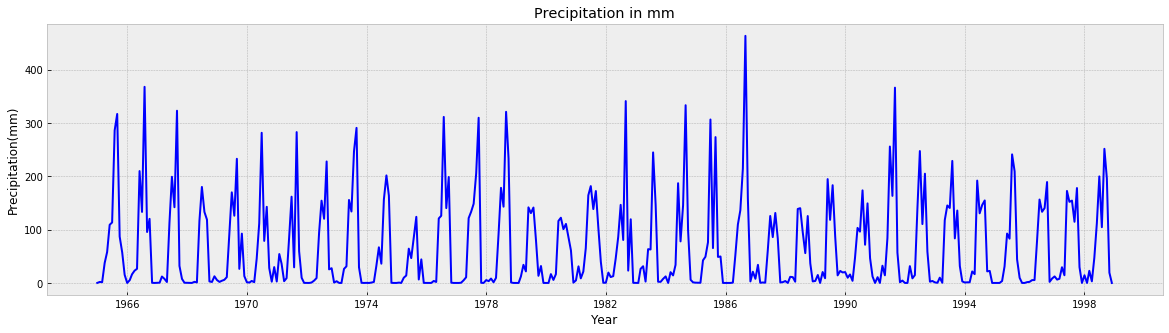

In [18]:
plt.figure(figsize=(20,5))
plt.plot(rainfall_data, color='blue')
plt.xlabel('Year')
plt.ylabel('Precipitation(mm)')
plt.title('Precipitation in mm')

Now we start with time series decomposition of this data to understand underlying patterns such as <b>trend</b>, <b>seasonality</b>, <b>cycle</b> and <b>irregular remainder</b> for the precipitation data.

In the above data, a cyclic pattern seems to be non-existent since the unit we are analysing is a relatively new unit to notice business cycles. Also in theory, business cycles in traditional businesses are observed over a period of 7 or more years. Hence, we won’t include business cycles in this time series decomposition exercise. Also, we observe a overall increasing trend across years. We will build our model based on the following function:

\begin{equation*} Y_t = f(Trend_t, Seasonality_t, Remainder_t) \end{equation*}

<h3> Decompose into components of time series</h3>
<b>1. Trend</b>
<p>Now, to begin with let's try to decipher <b>trends</b> embedded in the above precipitation time series.</p>
<p> It is a formal way to go through statistical checks:</p>
<ul><p>We can check stationarity using the following:</p><br>
    <li> 

<b>Plotting Rolling Statistics:</b> We can plot the moving average or moving variance and see if it varies with time. By moving average/variance we mean that at any instant 't', we'll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.<br>[Rolling average <a href="https://campus.datacamp.com/courses/pandas-foundations/time-series-in-pandas?ex=9#skiponboarding">1</a>,<a href="https://www.xenonstack.com/blog/data-science/time-series-forecasting-machine-deep-learning/">2</a>]</li>
\begin{equation*} Moving Average = \frac{\sum_{i=-m}^{m} Y^{t+i}}{2m} \end{equation*}<br>

<li><b>ADF (Augmented Dickey Fuller) Test</b><br>
The Dickey Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not. The null and alternate hypothesis of this test are:

<b>Null Hypothesis:</b> The series has a unit root (value of a =1)<br>
<b>Alternate Hypothesis:</b> The series has no unit root.<br>
If we fail to reject the null hypothesis, we can say that the series is non-stationary. This means that the series can be linear or difference stationary.<br>
</li>
</ul>

<b>Applying Moving Average on different windows</b>

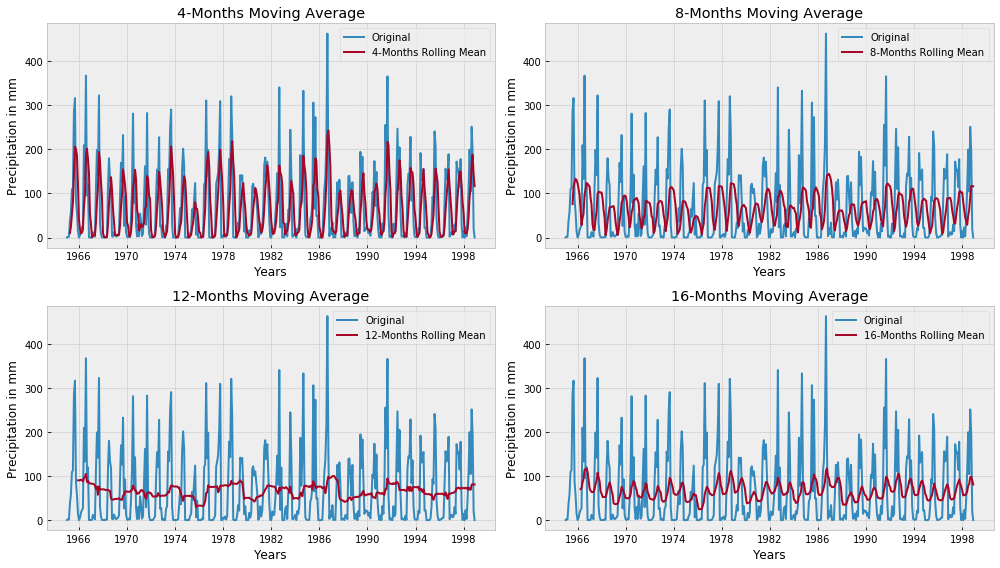

In [31]:
fig, axes = plt.subplots(2, 2, sharey=False, sharex=False)
fig.set_figwidth(14)
fig.set_figheight(8)
axes[0][0].plot(rainfall_data.index, rainfall_data, label='Original')
axes[0][0].plot(rainfall_data.index, rainfall_data.rolling(window=4).mean(), label='4-Months Rolling Mean')
axes[0][0].set_xlabel("Years")
axes[0][0].set_ylabel("Precipitation in mm")
axes[0][0].set_title("4-Months Moving Average")
axes[0][0].legend(loc='best')
############
axes[0][1].plot(rainfall_data.index, rainfall_data, label='Original')
axes[0][1].plot(rainfall_data.index, rainfall_data.rolling(window=8).mean(), label='8-Months Rolling Mean')
axes[0][1].set_xlabel("Years")
axes[0][1].set_ylabel("Precipitation in mm")
axes[0][1].set_title("8-Months Moving Average")
axes[0][1].legend(loc='best')
############
axes[1][0].plot(rainfall_data.index, rainfall_data, label='Original')
axes[1][0].plot(rainfall_data.index, rainfall_data.rolling(window=12).mean(), label='12-Months Rolling Mean')
axes[1][0].set_xlabel("Years")
axes[1][0].set_ylabel("Precipitation in mm")
axes[1][0].set_title("12-Months Moving Average")
axes[1][0].legend(loc='best')
############
axes[1][1].plot(rainfall_data.index, rainfall_data, label='Original')
axes[1][1].plot(rainfall_data.index, rainfall_data.rolling(window=16).mean(), label='16-Months Rolling Mean')
axes[1][1].set_xlabel("Years")
axes[1][1].set_ylabel("Precipitation in mm")
axes[1][1].set_title("16-Months Moving Average")
axes[1][1].legend(loc='best')
# ############
# axes[0][1].plot(rainfall_data.index, rainfall_data, label='Original')
# axes[0][1].plot(rainfall_data.index, rainfall_data.rolling(window=14).mean(), label='4-Months Rolling Mean')
# axes[0][1].set_xlabel("Years")
# axes[0][1].set_ylabel("Number of Tractor's Sold")
# axes[0][1].set_title("14-Months Moving Average")
# axes[0][1].legend(loc='best')
plt.tight_layout()
plt.show()

<p>Seasonality within a window of 12 months seems to more appealing from the above plots.</p>

<p>Let's plot the rolling mean and standard deviation on window of 12 months.</p>

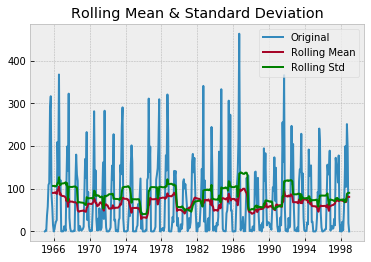

In [35]:
#Determing rolling statistics
rolmean = rainfall_data.rolling(window=12).mean()
rolstd = rainfall_data.rolling(window=12).std()

#Plot rolling statistics:
orig = plt.plot(rainfall_data, label='Original')
mean = plt.plot(rolmean, label='Rolling Mean')
std = plt.plot(rolstd, label = 'Rolling Std',color='green')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)


<p>Let's run the Dicky Fuller Test on the timeseries</p>

In [38]:
#dickey-fuller test
def adf_test(timeseries):
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
    
adf_test(rainfall_data.Precipitation) 

Results of Dickey-Fuller Test:
Test Statistic                  -4.238975
p-value                          0.000566
#Lags Used                      12.000000
Number of Observations Used    395.000000
Critical Value (5%)             -2.868885
Critical Value (1%)             -3.447014
Critical Value (10%)            -2.570683
dtype: float64



<b><font color='blue'>If the <font color="magenta">test statistic &lt; critical value</font>, we can reject the null hypothesis <font color="magenta">(the series is stationary)</font>.<br> When the <font color="magenta">test statistic &gt; critical value</font>, we fail to reject the null hypothesis <font color="magenta">(the series is not stationary).</font></font></b>

<br><b><font color="green">Here, the Test Statistic  &lt; critical value. Hence the series is stationary</font></b>.<br>
<p> As the time series is not stationary, differencing is not required</p>

<b>Seasonality</b>
<p>Seasonality effect could be seen from the below plot . Please refer to the Box plot shown in the beginning of the notebook for better inferences.</p>

Text(0.5,1,'Month vs Precipitation across all years')

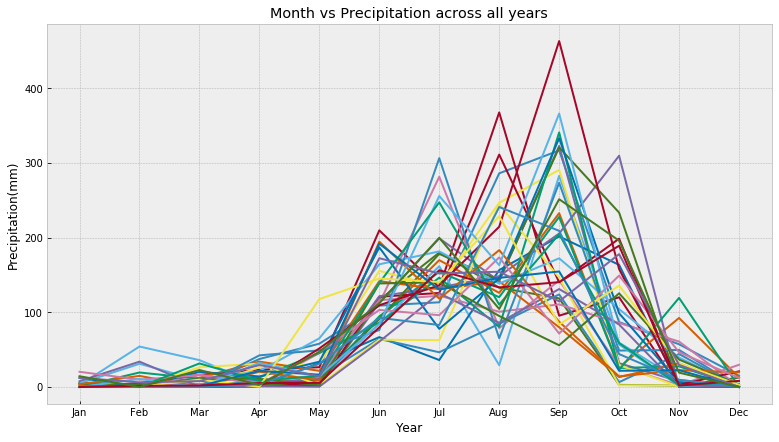

In [40]:
plt.figure(figsize=(13,7))
plt.plot(data_matrix)
plt.xlabel('Year')
plt.ylabel('Precipitation(mm)')
plt.title('Month vs Precipitation across all years')

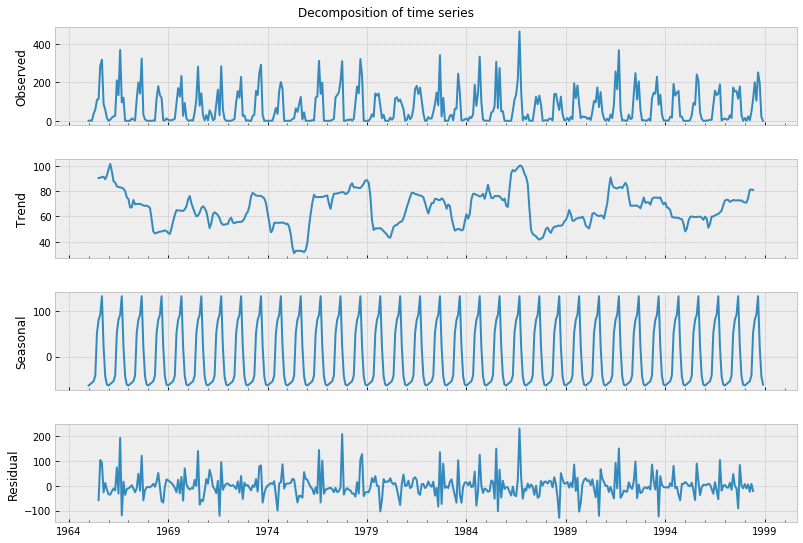

In [41]:
decomposition = sm.tsa.seasonal_decompose(rainfall_data, model='additive')
fig = decomposition.plot()
fig.set_figwidth(12)
fig.set_figheight(8)
fig.suptitle('Decomposition of time series')
plt.show()

<b>ACF and PACF for (p,q)</b>

<p>We find p and q values by plotting ACF and PACF plots.</p>

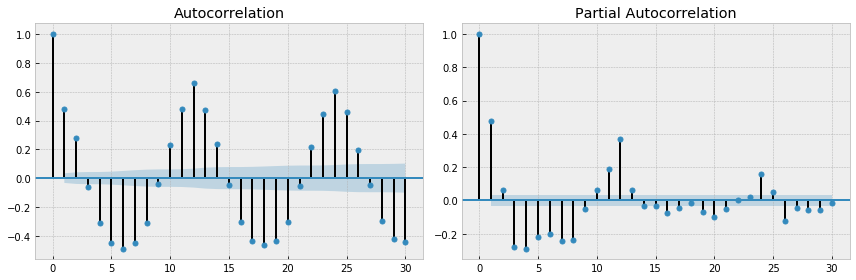

In [42]:
fig, axes = plt.subplots(1, 2, sharey=False, sharex=False)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(rainfall_data, lags=30, ax=axes[0], alpha=0.5)
smt.graphics.plot_pacf(rainfall_data, lags=30, ax=axes[1], alpha=0.5)
plt.tight_layout()

<p> The fluctating plots clearly depict that there is some seasonality component present in the series.</p>
<p> Thus we difference it to achieve non-seasonality</p>

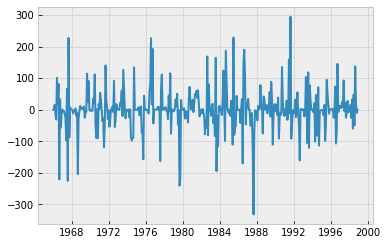

In [48]:
#differencing with a factor of 12
diff_12_data = rainfall_data.diff(periods=12)
diff_12_data.dropna(inplace=True)

plt.plot(diff_12_data)

In [49]:
adf_test(diff_12_data.Precipitation)

Results of Dickey-Fuller Test:
Test Statistic                -6.596863e+00
p-value                        6.890597e-09
#Lags Used                     1.300000e+01
Number of Observations Used    3.820000e+02
Critical Value (5%)           -2.869136e+00
Critical Value (1%)           -3.447585e+00
Critical Value (10%)          -2.570816e+00
dtype: float64


<p>Test statistic is less than critical values.</p>
<p>Hence it is stationary.</p>

<p> Let's try all combinations of different parameters and choose the best set whose AIC score is the least.</p>

In [52]:
# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 2)

# Generate all different combinations of p, d and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [53]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [54]:
seasonal_pdq 

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [55]:
best_aic = np.inf
best_pdq = None
best_seasonal_pdq = None
temp_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:        
        try:
            temp_model = sm.tsa.statespace.SARIMAX(rainfall_data,
                                             order = param,
                                             seasonal_order = param_seasonal,
                                             enforce_stationarity=True,
                                             enforce_invertibility=True)
            results = temp_model.fit()
            if results.aic < best_aic:
                best_aic = results.aic
                best_pdq = param
                best_seasonal_pdq = param_seasonal
        except:
            continue

print("Best SARIMAX{}x{}12 model - AIC:{}".format(best_pdq, best_seasonal_pdq, best_aic))


/home/vubuntu/miniconda2/lib/python2.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Best SARIMAX(1, 0, 1)x(1, 1, 1, 12)12 model - AIC:4251.72041481


In [56]:
best_pdq = (1, 0, 1)
best_seasonal_pdq = (1, 1, 1, 12)

In [58]:
#building the model with the best set of parameters obtained above
best_model = sm.tsa.statespace.SARIMAX(rainfall_data,
                                      order=best_pdq,
                                      seasonal_order=best_seasonal_pdq,
                                      enforce_stationarity=True,
                                      enforce_invertibility=True)
best_results = best_model.fit()

In [60]:
print(best_results.summary().tables[0])

                                 Statespace Model Results                                 
Dep. Variable:                      Precipitation   No. Observations:                  408
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 12)   Log Likelihood               -2120.860
Date:                            Fri, 26 Oct 2018   AIC                           4251.720
Time:                                    00:54:37   BIC                           4271.627
Sample:                                01-01-1965   HQIC                          4259.607
                                     - 12-01-1998                                         
Covariance Type:                              opg                                         


<b>Predictions Time!</b>

In [61]:
pd.to_datetime('1990-01-01')

Timestamp('1990-01-01 00:00:00')

In [62]:
pred_dynamic = best_results.get_prediction(start=pd.to_datetime('1990-01-01'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

In [63]:
rainfall_predicted = pred_dynamic.predicted_mean
rainfall_truth = rainfall_data['1990':].Precipitation

In [64]:
rainfall_predicted = pred_dynamic.predicted_mean
rainfall_truth = rainfall_data['1990':].Precipitation

In [65]:
mse = ((rainfall_predicted - rainfall_truth) ** 2).mean()
print('The Mean Squared Error of our predictions is {}'.format(round(mse, 4)))

The Mean Squared Error of our predictions is 1888.4635


In [66]:
rainfall_data.index[-1]


Timestamp('1998-12-01 00:00:00', freq='MS')

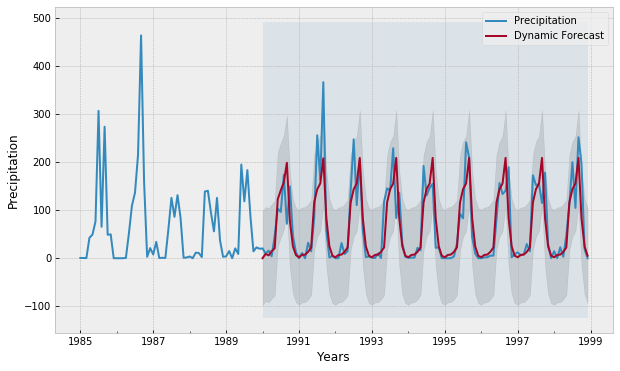

In [68]:
 #Plot the actual values.
axis_plt = rainfall_data['1985':].plot(label='Observed', figsize=(10, 6))

# Plot the predicted values.
pred_dynamic.predicted_mean.plot(ax=axis_plt, label='Dynamic Forecast')

# Plot confidence values and fill it with some colour.
axis_plt.fill_between(pred_dynamic_ci.index, pred_dynamic_ci.iloc[:, 0], pred_dynamic_ci.iloc[:, 1], color='k', alpha=0.1)
axis_plt.fill_betweenx(axis_plt.get_ylim(), pd.to_datetime('1990'), rainfall_data.index[-1], alpha=0.1, zorder=-1)

# Set labels.
axis_plt.set_xlabel('Years')
axis_plt.set_ylabel('Precipitation')

# Put legend on the plot at the best place it fits.
plt.legend(loc='best')

<b>Forecasts ..!!</b>

In [69]:
# Get forecast 36 steps (3 years) ahead in future
n_steps = 36
pred_uc_95 = best_results.get_forecast(steps=n_steps, alpha=0.05) # alpha=0.05 95% CI

# Get confidence intervals 95% of the forecasts
pred_ci_95 = pred_uc_95.conf_int()

In [70]:
index = pd.date_range(rainfall_data.index[-1] + 1, periods=n_steps, freq='MS')
forecast_data = pd.DataFrame(np.column_stack([pred_uc_95.predicted_mean, pred_ci_95]), 
                     index=index, columns=['forecast', 'lower_ci_95', 'upper_ci_95'])

forecast_data.head()

,forecast,lower_ci_95,upper_ci_95
1999-01-01,3.114318,-93.749768,99.978403
1999-02-01,5.893837,-91.353702,103.141375
1999-03-01,9.122800,-88.301613,106.547212
1999-04-01,12.303052,-85.203073,109.809177
1999-05-01,27.228723,-70.315178,124.772624


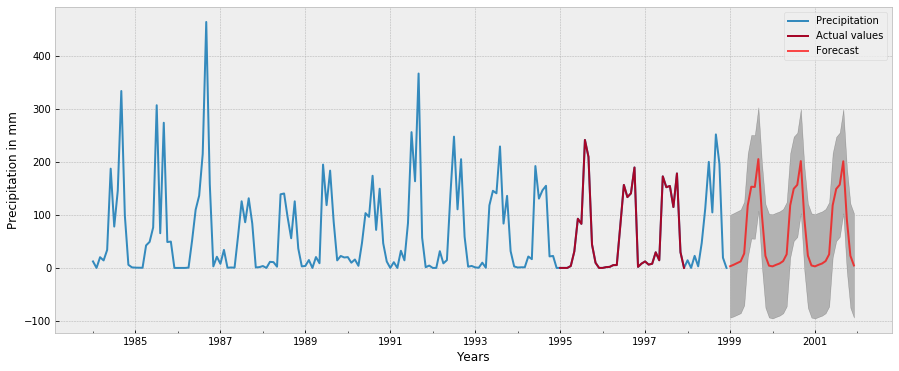

In [72]:
axis_plt = rainfall_data['1984':].plot(label='Observed', figsize=(15, 6))

test_rainfall_data[:'1997-12-01'].Precipitation.plot(ax=axis_plt, label='Actual values')
forecast_data['forecast'].plot(ax=axis_plt, label='Forecast', alpha=0.7, color='r')

axis_plt.fill_between(forecast_data.index, forecast_data['lower_ci_95'], forecast_data['upper_ci_95'], color='k', alpha=.25)

axis_plt.set_xlabel('Years')
axis_plt.set_ylabel('Precipitation in mm')
plt.legend(loc='best')